# Telco Customer Churn Prediction — Data Cleaning & EDA

### Step 1: Load Dataset
We load the Telco Customer Churn dataset and preview the structure.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display dataset shape and first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 2: Inspect Data Structure
We check data types, missing values, and column structure.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Step 3: Data Cleaning
Convert `TotalCharges` to numeric and handle missing values.

In [44]:
# Convert 'TotalCharges' from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
print("Missing values before imputation:\n", df.isnull().sum())

# Impute missing TotalCharges values with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Confirm no missing values remain
print("Missing values after imputation:\n", df.isnull().sum())

Missing values before imputation:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Missing values after imputation:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges     

/tmp/ipykernel_258760/2599969677.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


### Step 4: Check for Duplicates

In [45]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Step 5: Churn Distribution

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


/tmp/ipykernel_258760/1721766817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


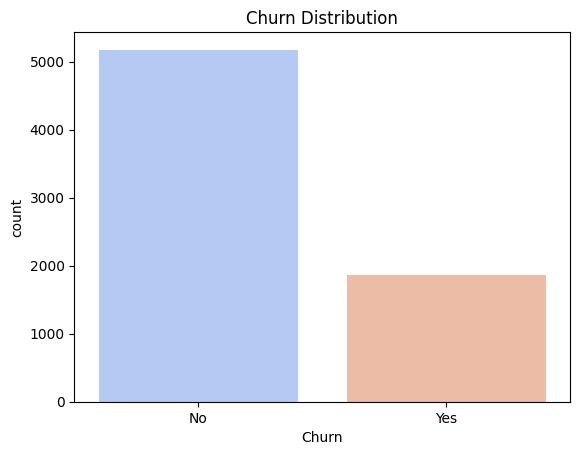

In [46]:
print(df['Churn'].value_counts(normalize=True))

sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

**Observation:**  
The churn distribution shows that approximately 26.5% of customers have churned, indicating a class imbalance. This highlights the need for imbalance handling techniques during model training.

### Step 6: Churn by Contract Type

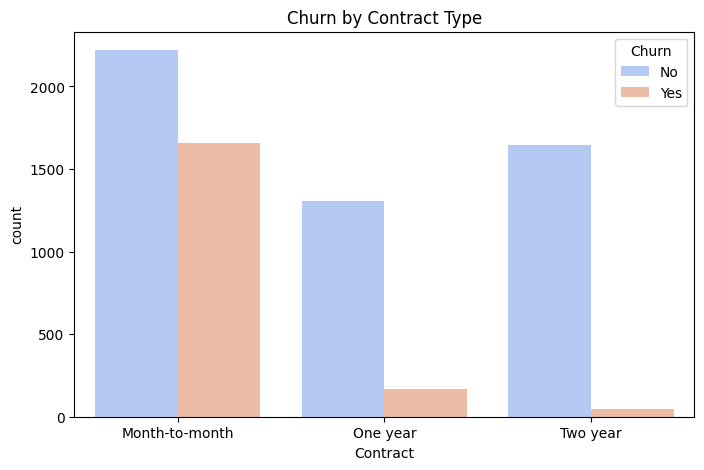

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='coolwarm')
plt.title("Churn by Contract Type")
plt.show()

**Observation:**  
Customers on month-to-month contracts exhibit the highest churn rates, while those with one-year and two-year contracts show significantly lower churn. This suggests contract duration is a strong predictor of churn.

### Step 7: Churn by Payment Method

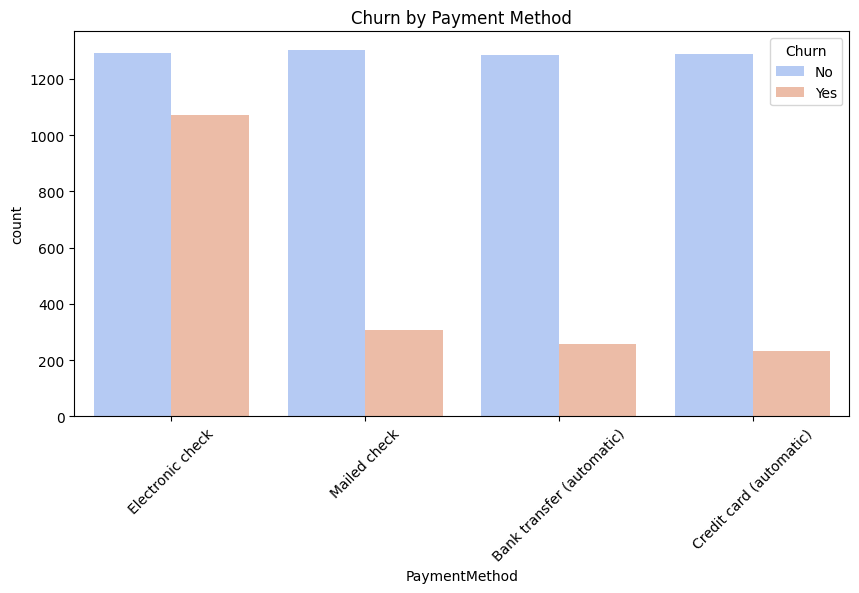

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='coolwarm')
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

**Observation:**  
Customers using electronic checks as their payment method have the highest churn rate. Automated payments (bank transfer, credit card) are associated with lower churn, indicating that ease of billing reduces customer loss.

### Step 8: Tenure Distribution by Churn

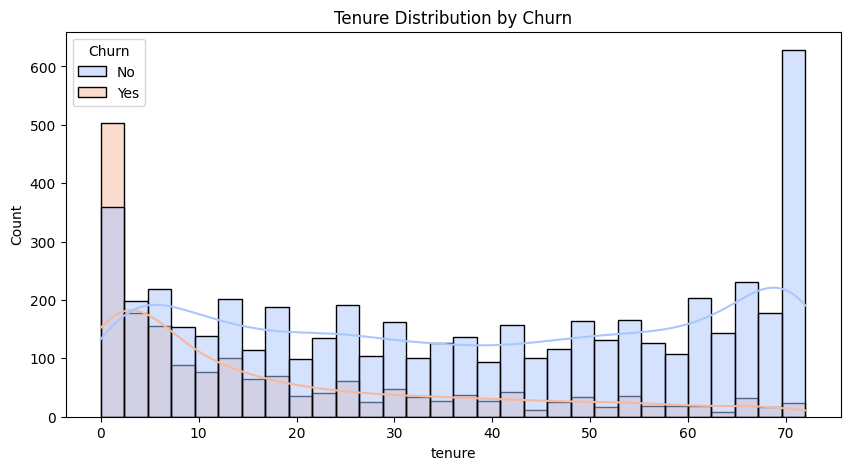

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='coolwarm')
plt.title("Tenure Distribution by Churn")
plt.show()

**Observation:**  
Customers with lower tenure (under 12 months) are far more likely to churn. Longer-tenure customers show much lower churn risk, reinforcing the importance of loyalty and long-term engagement.

### Step 9: Monthly Charges vs. Churn Boxplot

/tmp/ipykernel_258760/595565904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


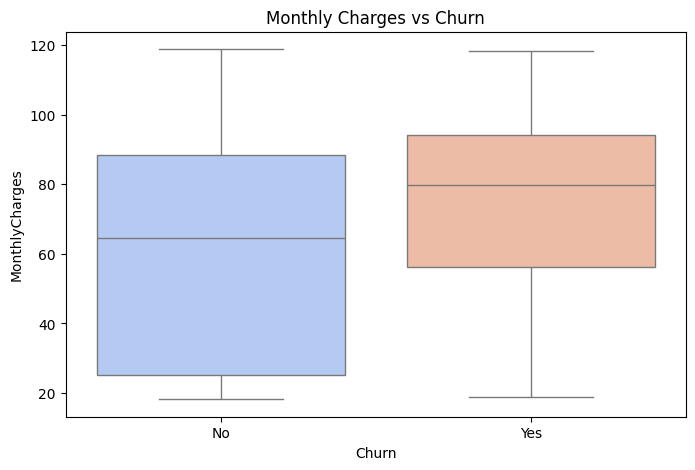

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title("Monthly Charges vs Churn")
plt.show()

**Observation:**  
Churned customers tend to have higher monthly charges on average. This indicates that price sensitivity or perceived value could be contributing to churn.

### Step 10: Correlation Heatmap

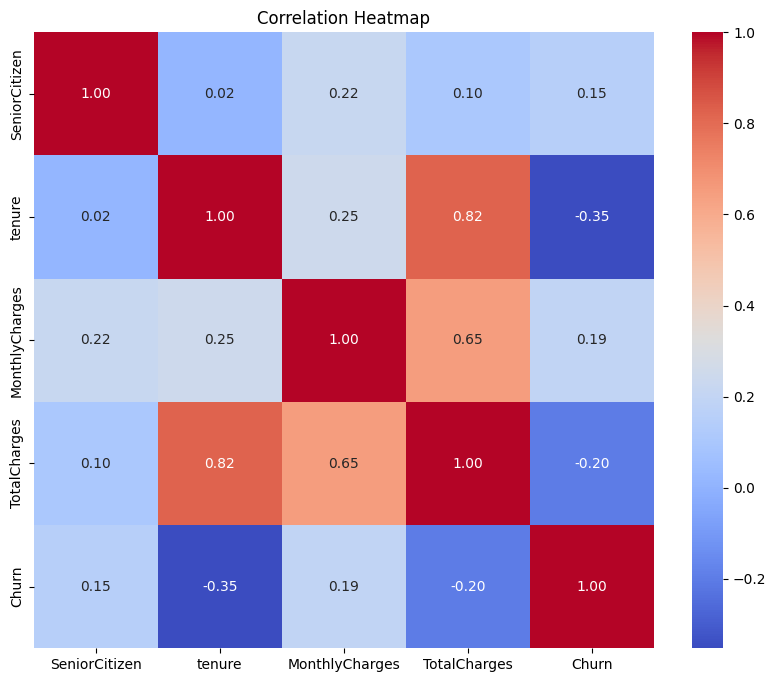

In [51]:
# Map churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select numeric features
numeric_features = df.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("../results/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

**Observation:**  
There is a strong positive correlation between tenure and TotalCharges, as expected. MonthlyCharges has a moderate relationship with churn. Contract type and tenure features are likely to be among the most important predictors.

### ✅ EDA Summary:
- Churn rate is around 26.5%, confirming class imbalance.
- Month-to-month contracts, electronic check payments, short tenure, and higher monthly charges are strongly associated with churn.
- Tenure and contract type are key features that will influence model development.
- Class imbalance handling and feature engineering around tenure groups will be important in the next phase.